# Part 1: EDA

### Content List
- [Imports](#Imports)
- [Loading the Data](#Loading-the-Date)
- [Defining Target Features](#Defining-the-Target-Features)
- [Dropping Specific Columns](#Dropping-specific-columns)
- [Checking the Correlations](#Checking-Correlations)
- [Visualizing EDA](#Visualizing-EDA)
- [Additional Data Cleaning](#Additional-Data-Cleaning)
- [Reviewing Data Types](#Reviewing-Data-Types)

### Imports

In [ ]:
### Imports
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import folium
from datetime import datetime

#### Reading in Data from CSV
This data comes from a Kaggle dataset initially, from this link: https://www.kaggle.com/wordsforthewise/lending-club.

In [6]:
#read in file from csv to dataframe after downloading it to the same folder as this notebook
data_read = pd.read_csv('./dataset/dataset_2007_to_2018.csv')

/var/folders/mz/7whxfwmx1bs3m6p4ln701xkw0000gn/T/ipykernel_1738/1545620594.py:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data_read = pd.read_csv('./dataset/dataset_2007_to_2018.csv')


In [7]:
for i in data_read.columns:
    print(i)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
to

In [8]:
print(f'There are a total of {len(data_read.columns)} columns by default.')

There are a total of 151 columns by default.


In [9]:
# By saving the data as something other than what was imported, we no longer need to read in the data again to reset
data = data_read

In [10]:
data.shape

(2260701, 151)

**Findings:** This dataset consists of over 2.26 million rows and 145 columns, amounting to more than 340 million individual data points. During the exploratory data analysis (EDA) process, the dataset will be reduced while prioritizing the retention of its value and representativeness. Additionally, external research highlights the progression of data collection over time. The dataset has grown substantially, from 188,127 rows and 31 features in 2014 to 2,260,701 rows and 151 features in 2018. This represents an approximately 58.5-fold increase within three years, reflecting the rapidly accelerating pace of data generation.

In [11]:
### Identifying contents of data( data types, shape, descriptive statistics, etc)
missing_data = data.isna()
missing_data_amount = missing_data.sum().sum()
print(f'There are {missing_data_amount} missing values in the Lending Club dataset.')

There are 108486252 missing values in the Lending Club dataset.


In [12]:
data.dtypes.value_counts(normalize=True)

float64    0.748344
object     0.251656
Name: proportion, dtype: float64

The object types are not overly complex as the split is approximately 75% Float64 and 25% Object. Since Machine Learning requires numeric inputs in order to function, it is a relief that there is not an overwhelming amount of Object (or any other non-numeric) data types for our 151 features. 

In [13]:
data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [14]:
avg_rate = data['int_rate'].mean()
avg_rate = round((avg_rate),2)
print(f'The Average Interest Rate is: {avg_rate}%')

avg_loan = data['loan_amnt'].mean()
avg_loan = round((avg_loan),2)
print(f'The Average Loan amount is: {avg_loan}$')

The Average Interest Rate is: 13.09%
The Average Loan amount is: 15046.93$


**FINDINGS:** Using the `describe` method, it is evident that several columns contain a significant number of missing values. Outliers are also present, particularly in the `annual_inc` (Reported Annual Income) column, which will require attention before proceeding with modeling. The `id`, `member_id`, and `url` columns can be dropped immediately, as they provide no meaningful information, as confirmed by consulting the data dictionary. Additionally, some individuals have reported an annual income of 0, which could be noteworthy and warrants further investigation.

## Defining the Target Features


In [15]:
loans = data['loan_status'].value_counts(normalize=True)
loans

loan_status
Fully Paid                                             0.476298
Current                                                0.388521
Charged Off                                            0.118796
Late (31-120 days)                                     0.009496
In Grace Period                                        0.003732
Late (16-30 days)                                      0.001924
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000018
Name: proportion, dtype: float64

In [16]:
#applying the class definitions to the columns
data = data.dropna(subset=['loan_status'])

#using masking to exclude all loans that include 'Current' and 'In Grace Period' text in the fields
data = data[data['loan_status'] != 'Current']
data = data[data['loan_status'] != 'In Grace Period']

#after dropping 'Current' and 'In Grace Period' the lambda function makes the rest of it easy!
data['classes'] = data['loan_status'].apply(lambda x: 1 if 'Fully Paid' in x else 0)

In [17]:
classes = data['classes'].value_counts(normalize=True)
classes

classes
1    0.785157
0    0.214843
Name: proportion, dtype: float64

In [18]:
data['fico_range_high'].mean()

700.0929904688427

In [19]:
data['fico_range_low'].mean()

696.0928514500533

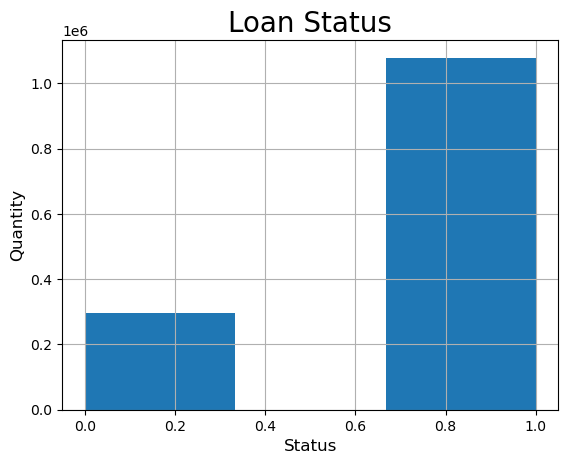

In [20]:
data['classes'].hist(bins=3)
plt.title('Loan Status', size=20);
plt.xlabel('Status', size= 12);
plt.ylabel('Quantity', size=12);

## Dropping specific columns
This dataset contains an extensive number of features, many of which are redundant or overlapping. The following features have been identified for removal:

- id, member_id, and url: These columns provide no meaningful information.
- all hardship-related columns: These are redundant, as a binary flag already exists to indicate hardship status.
- all secondary applicant columns: The application_type column sufficiently signifies whether the application was joint or single.
- all settlement-related columns: These columns are unnecessary because loans not fully paid off are already reflected in the settlement status.
- columns with more than 70% missing values: To maintain data integrity, no imputed values will be added to replace the missing data.

In [21]:
data.isnull().sum()

id                             0
member_id                1373915
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
                          ...   
settlement_date          1339707
settlement_amount        1339707
settlement_percentage    1339707
settlement_term          1339707
classes                        0
Length: 152, dtype: int64

In [22]:
data.isnull().sum().sum()

71696984

In [23]:
data = data.drop(columns= ['id', 'member_id', 'url', 'policy_code'])

In [24]:
data = data.drop(columns=['loan_status'])

In [25]:
data = data.drop(columns=['zip_code','sub_grade','mths_since_last_record','mths_since_last_delinq', 'mths_since_recent_bc_dlq','mths_since_recent_bc',
                          'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'mo_sin_old_il_acct',
                          'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'last_credit_pull_d'])

In [26]:
data = data.drop(columns=['last_pymnt_d', 'next_pymnt_d','total_bal_il', 'total_bc_limit', 'total_cu_tl',
                          'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
                          'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 'initial_list_status'])

In [27]:
# All of the hardship data has been reduced to whether or not there was a payment plan present
data = data.drop(columns=['debt_settlement_flag_date', 'hardship_type',
                          'hardship_reason', 'hardship_status', 
                          'hardship_amount', 'hardship_start_date',
                          'hardship_end_date', 'payment_plan_start_date', 'hardship_length',
                          'hardship_dpd', 'hardship_loan_status', 'deferral_term',
                          'orig_projected_additional_accrued_interest',
                          'hardship_payoff_balance_amount', 'hardship_last_payment_amount'])

In [28]:
# all of these features are reduced to the 'application_type' which binarizes between single and joint applicant
data = data.drop(columns=['sec_app_earliest_cr_line',
                          'revol_bal_joint','verification_status_joint', 'dti_joint', 'annual_inc_joint',
                          'sec_app_inq_last_6mths', 'sec_app_mort_acc',
                          'sec_app_open_acc', 'sec_app_revol_util','sec_app_open_act_il',
                          'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
                          'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'sec_app_fico_range_low', 'sec_app_fico_range_high' ])

In [29]:
data = data.drop(columns=['all_util', 'open_acc_6m', 'inq_last_12m', 'open_act_il', 
                          'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 
                          'inq_fi', 'max_bal_bc', 'mths_since_last_major_derog',
                          'il_util', 'num_tl_120dpd_2m', 'mths_since_rcnt_il'])


In [30]:
#similar to prior groupings, one feature 'settlement_flag' represents these features in order to reduce complexity
data= data.drop(columns=['settlement_status', 'settlement_date',
                         'settlement_amount', 'settlement_percentage', 'settlement_term'])

## Checking Correlations

In [31]:
numeric_data = data.select_dtypes(include='number')
corr_df = numeric_data.corr()
# corr_df = data.corr()
corr_df

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_il_high_credit_limit,classes
loan_amnt,1.000000,0.999556,0.998259,0.142477,0.953021,0.309873,0.032195,-0.002138,0.101643,0.101642,...,-0.021811,-0.020131,0.087934,0.020342,-0.092956,0.007817,0.334170,0.275413,0.200318,-0.072908
funded_amnt,0.999556,1.000000,0.998808,0.142571,0.953674,0.309765,0.032588,-0.001945,0.100813,0.100812,...,-0.021812,-0.020133,0.087934,0.020341,-0.092761,0.007949,0.334169,0.275413,0.200315,-0.072978
funded_amnt_inv,0.998259,0.998808,1.000000,0.142661,0.952313,0.309242,0.033657,-0.001645,0.100030,0.100029,...,-0.021826,-0.020149,0.087948,0.020290,-0.092393,0.008243,0.334197,0.275419,0.200319,-0.072597
int_rate,0.142477,0.142571,0.142661,1.000000,0.155666,-0.071362,0.146165,0.047965,-0.403169,-0.403166,...,0.026583,0.206641,-0.063701,0.248037,0.058580,0.011477,-0.118486,0.004525,-0.002747,-0.263577
installment,0.953021,0.953674,0.952313,0.155666,1.000000,0.300753,0.035986,0.007124,0.051494,0.051493,...,-0.016399,0.000162,0.070509,0.040028,-0.085199,0.014752,0.301477,0.260119,0.185541,-0.057873
annual_inc,0.309873,0.309765,0.309242,-0.071362,0.300753,1.000000,-0.139055,0.040924,0.069903,0.069904,...,0.007510,0.052413,-0.007275,-0.016370,-0.043951,0.037793,0.408800,0.315126,0.262025,0.039071
dti,0.032195,0.032588,0.033657,0.146165,0.035986,-0.139055,1.000000,-0.008023,-0.060032,-0.060035,...,-0.013967,0.068868,0.072104,0.127592,-0.016726,-0.022822,0.015190,0.223567,0.252218,-0.084895
delinq_2yrs,-0.002138,-0.001945,-0.001645,0.047965,0.007124,0.040924,-0.008023,1.000000,-0.174090,-0.174088,...,0.656164,-0.025121,-0.444748,-0.010852,-0.047360,0.011169,0.058910,0.032243,0.062321,-0.020347
fico_range_low,0.101643,0.100813,0.100030,-0.403169,0.051494,0.069903,-0.060032,-0.174090,1.000000,1.000000,...,-0.101882,-0.092465,0.300555,-0.410429,-0.202539,-0.057341,0.195576,0.031953,0.062800,0.129188
fico_range_high,0.101642,0.100812,0.100029,-0.403166,0.051493,0.069904,-0.060035,-0.174088,1.000000,1.000000,...,-0.101881,-0.092467,0.300552,-0.410426,-0.202536,-0.057341,0.195577,0.031951,0.062798,0.129186


In [32]:
data.isnull().sum().sort_values(ascending=False)

desc                       1247947
emp_title                    88473
emp_length                   80850
pct_tl_nvr_dlq               70430
avg_cur_bal                  70299
                            ...   
collection_recovery_fee          0
last_pymnt_amnt                  0
last_fico_range_high             0
last_fico_range_low              0
classes                          0
Length: 72, dtype: int64

In [33]:
data.shape

(1373915, 72)

In [34]:
data['title'].value_counts()

title
Debt consolidation             675757
Credit card refinancing        254681
Home improvement                76832
Other                           68683
Major purchase                  24718
                                ...  
Life Perserver Loan                 1
NeverAgain                          1
Consolidate 3 loans                 1
notebook                            1
debt reduction/hone updates         1
Name: count, Length: 63153, dtype: int64

In [35]:
data.isnull().sum().sort_values(ascending=False)

desc                       1247947
emp_title                    88473
emp_length                   80850
pct_tl_nvr_dlq               70430
avg_cur_bal                  70299
                            ...   
collection_recovery_fee          0
last_pymnt_amnt                  0
last_fico_range_high             0
last_fico_range_low              0
classes                          0
Length: 72, dtype: int64

In [36]:
# 'num_actv_bc_tl' is the first attempt to remove the majority of the 70,200 missing values across 17 features
data = data[data['num_actv_bc_tl'].notna()]

In [37]:
data = data[data['bc_util'].notna()]

In [38]:
data = data[data['emp_length'].notna()]

I drop the employment length missing values because, although likely to be underreported, it is worse to make up data here

In [39]:
#exploring the supplied purpose field for loans
data['purpose'].value_counts()

purpose
debt_consolidation    710891
credit_card           270494
home_improvement       76974
other                  66793
major_purchase         25068
medical                13259
small_business         12454
car                    11741
moving                  8087
vacation                7791
house                   6283
wedding                  848
renewable_energy         747
educational                1
Name: count, dtype: int64

In [40]:
#dropping educational as a purpose for loans due to there only being a single instance
data = data[data['purpose'] != 'educational']

In [41]:
data.shape

(1211430, 72)

### Visualizing EDA

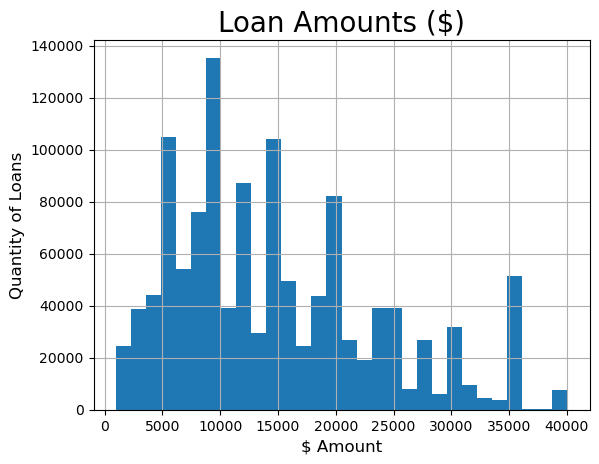

In [42]:
data['loan_amnt'].hist(bins=30)
plt.title('Loan Amounts ($)', size=20);
plt.xlabel('$ Amount', size= 12);
plt.ylabel('Quantity of Loans', size=12);

**Thoughts:** The loan amount data clearly exhibits higher frequencies at values that are multiples of 5,000. To account for these patterns when creating bins, it is essential to ensure that these spikes are positioned at the center of each bin. The following bin ranges are proposed to achieve this:

- 0–2,500
- 2,501–7,500
- 7,501–12,500
- 12,501–17,500
- 17,501–22,500
- 22,501–27,500
- 27,501–32,500
- 32,501–37,500
- 37,501–42,500

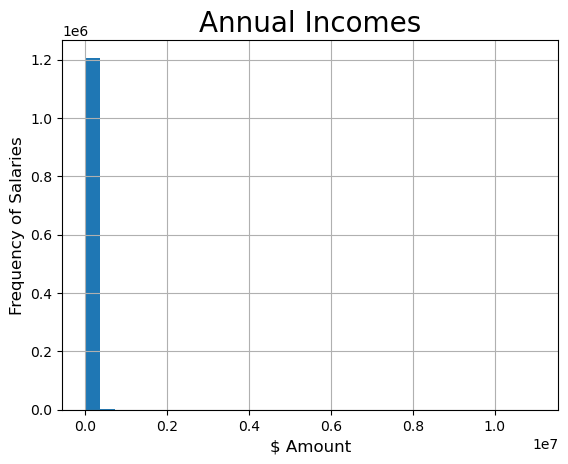

In [43]:
data['annual_inc'].hist(bins=30)
plt.title('Annual Incomes', size=20);
plt.xlabel('$ Amount', size=12);
plt.ylabel('Frequency of Salaries', size=12);

**Thoughts:** It is immediately obvious there is something going on with the annual_inc column, most likely large outliers are present. This results in the absurd graph above, which I will need to investigate further. Before removing the outliers, the income ranges from 

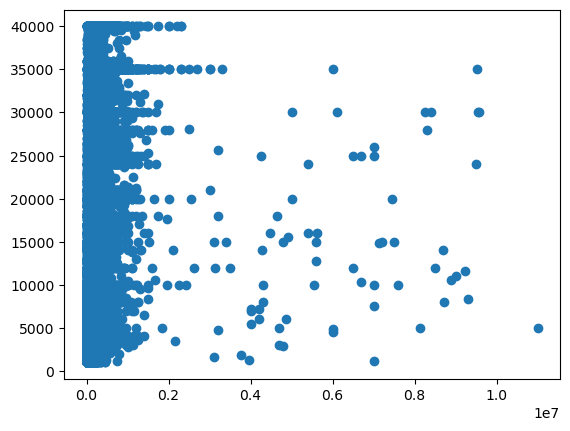

In [44]:
## SCATTER PLOT OF ANNUAL INCOME TO SHOW OUTLIERS
plt.scatter(data['annual_inc'], data['loan_amnt'])

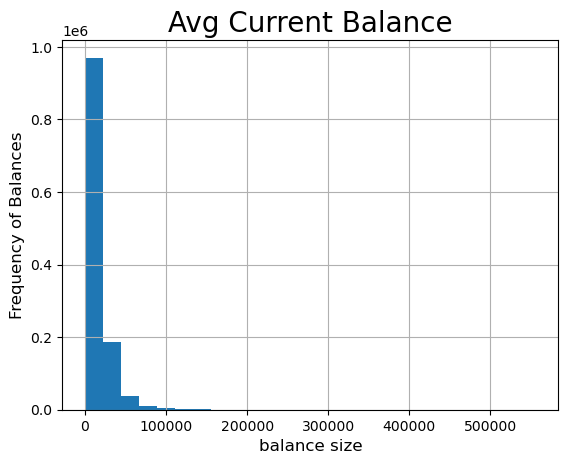

In [45]:
data['avg_cur_bal'].hist(bins=25)
plt.title('Avg Current Balance', size = 20);
plt.xlabel('balance size', size = 12);
plt.ylabel('Frequency of Balances', size = 12);

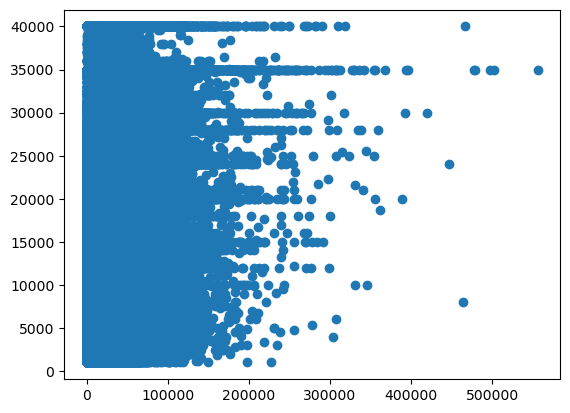

In [46]:
## SCATTER PLOT OF AVG CURRENT BALANCE TO SHOW OUTLIERS
plt.scatter(data['avg_cur_bal'], data['loan_amnt'])

In [47]:
data['avg_cur_bal'].describe()

count    1.211430e+06
mean     1.357119e+04
std      1.611179e+04
min      0.000000e+00
25%      3.185000e+03
50%      7.554000e+03
75%      1.885100e+04
max      5.559250e+05
Name: avg_cur_bal, dtype: float64

## Data CleaningDealing with outliers- IMPROVE VISUALIZATIONS
annual_inc, avg_cur_bal

In [48]:
# capping the annual income at 300_000 in order to represent a more normal distribution and remove outliers
data_scrub = data[data['annual_inc'] <= 250_000 ]

In [49]:
# capping the minimum of annual reported income at 1_000 as that data is unreliable
data_scrub = data_scrub[data_scrub['annual_inc']> 500]

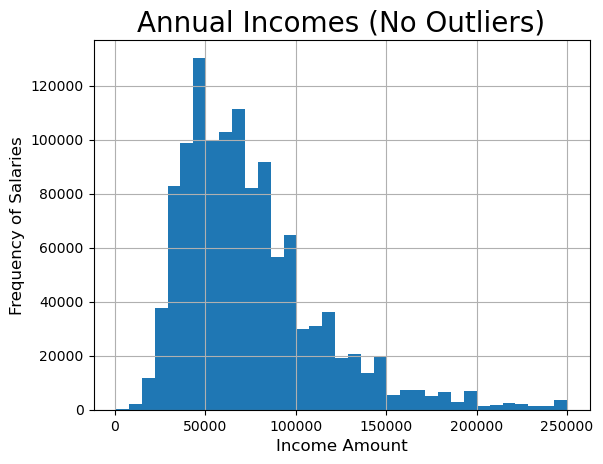

In [50]:
data_scrub['annual_inc'].hist(bins=35)
plt.title('Annual Incomes (No Outliers)', size=20);
plt.xlabel('Income Amount', size=12);
plt.ylabel('Frequency of Salaries', size=12);

In [51]:
data_scrub = data_scrub[data_scrub['avg_cur_bal'] < 60_000]

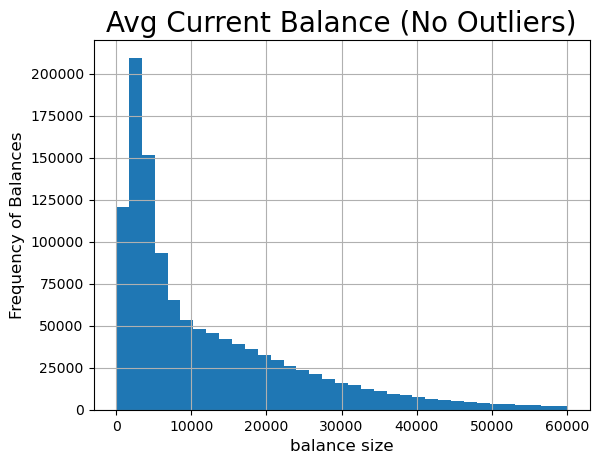

In [52]:
data_scrub['avg_cur_bal'].hist(bins=35)
plt.title('Avg Current Balance (No Outliers)', size = 20);
plt.xlabel('balance size', size = 12);
plt.ylabel('Frequency of Balances', size = 12);

### Looking at Text Fields: 
a handful of columns in this dataset are text based and need further investigation in order to determine how to manipulate them so they are more useful. As they are currently object data types we need to find a way to convert this data into numerical information. Two approaches immediately 

In [53]:
data['emp_title'].value_counts()

emp_title
Teacher                              21355
Manager                              19772
Owner                                10641
Registered Nurse                      8885
RN                                    8585
                                     ...  
Peer mentor                              1
Sr. Information Security Analyst         1
ETL- Log                                 1
Promotions coordinator                   1
Exec Dir Internal Audit                  1
Name: count, Length: 341751, dtype: int64

In [54]:
data['title'].value_counts()

title
Debt consolidation                628293
Credit card refinancing           237167
Home improvement                   69634
Other                              61647
Major purchase                     22770
                                   ...  
Mission: Debt Payoff!                  1
Positive Financial Steps               1
personal  payoff                       1
renovation of existing home.           1
Home Improvement/Pay off Debts         1
Name: count, Length: 37176, dtype: int64

In [55]:
data['desc'].value_counts()

desc
                                                                                                                                                                                                                                                                                                                                                 23
  Borrower added on 03/17/14 > Debt consolidation<br>                                                                                                                                                                                                                                                                                            10
  Borrower added on 03/10/14 > Debt consolidation<br>                                                                                                                                                                                                                                                                      

**Thoughts:** The dataset contains significant complexity in textual columns, with **341,751 unique values for `emp_title`**, **37,177 for `title`**, and **73,999 for `desc`**. This level of variability makes it challenging to process these columns directly. After converting these fields to string format, Natural Language Processing (NLP) techniques will need to be integrated into the project. Ideally, this would involve reducing complexity by grouping similar titles, correcting spelling errors, and applying other preprocessing techniques. However, due to time constraints, it may not be feasible to implement these comprehensive approaches in this project.

### Additional Data Cleaning

In [56]:
#i wrote a function to automate the dropping of rows that contain NaN in columns which had 2000 or less NaN

def drop_na(df):
    cols=data.columns
    subset=[]
    for i in cols:
        #check number of missing values
        missing_vals = df[i].isnull().sum()
        #if less than 2000 na, drop the rows containing na
        if missing_vals <= 2000:
            subset.append(i)
            
        df.dropna(subset=subset,inplace=True)
        print(f'finished checking column  "{i}"')
    print('FINISHED ALL!')

drop_na(data)

finished checking column  "loan_amnt"
finished checking column  "funded_amnt"
finished checking column  "funded_amnt_inv"
finished checking column  "term"
finished checking column  "int_rate"
finished checking column  "installment"
finished checking column  "grade"
finished checking column  "emp_title"
finished checking column  "emp_length"
finished checking column  "home_ownership"
finished checking column  "annual_inc"
finished checking column  "verification_status"
finished checking column  "issue_d"
finished checking column  "pymnt_plan"
finished checking column  "desc"
finished checking column  "purpose"
finished checking column  "title"
finished checking column  "addr_state"
finished checking column  "dti"
finished checking column  "delinq_2yrs"
finished checking column  "earliest_cr_line"
finished checking column  "fico_range_low"
finished checking column  "fico_range_high"
finished checking column  "inq_last_6mths"
finished checking column  "open_acc"
finished checking column  

In [57]:
data.isnull().sum().sort_values(ascending=False)

desc                       1135844
title                        14534
emp_title                     5806
loan_amnt                        0
num_accts_ever_120_pd            0
                            ...   
collection_recovery_fee          0
last_pymnt_amnt                  0
last_fico_range_high             0
last_fico_range_low              0
classes                          0
Length: 72, dtype: int64

In [58]:
data['emp_title'].fillna(" . ", inplace= True)

In [59]:
data['title'].fillna(" . ", inplace= True)

In [60]:
data['desc'].fillna(" . ", inplace= True)

In [61]:
data.shape

(1210906, 72)

## Reviewing Data Types

In [62]:
data.dtypes.value_counts()

float64    54
object     17
int64       1
Name: count, dtype: int64

In [63]:
object_cols = data.select_dtypes(include='object').columns

In [64]:
# data['issue_d'].head()

In [65]:
data['issue_d'] = pd.to_datetime(data['issue_d'])

/var/folders/mz/7whxfwmx1bs3m6p4ln701xkw0000gn/T/ipykernel_1738/2469893809.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d'] = pd.to_datetime(data['issue_d'])


In [66]:
data['earliest_cr_line'].head()

0    Aug-2003
1    Dec-1999
2    Aug-2000
4    Jun-1998
5    Oct-1987
Name: earliest_cr_line, dtype: object

In [67]:
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

/var/folders/mz/7whxfwmx1bs3m6p4ln701xkw0000gn/T/ipykernel_1738/1040952477.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])


In [68]:
# taking the difference of the 2 columns to create length of credit history
data['credit_length_days'] = data['issue_d'] - data['earliest_cr_line']

In [69]:
#extracting just the days out of the timedate format
data['credit_length_days'] = data['credit_length_days'].dt.days

In [70]:
#verifying the output
data['credit_length_days'].head()

0     4505
1     5844
2     5600
4     6392
5    10288
Name: credit_length_days, dtype: int64

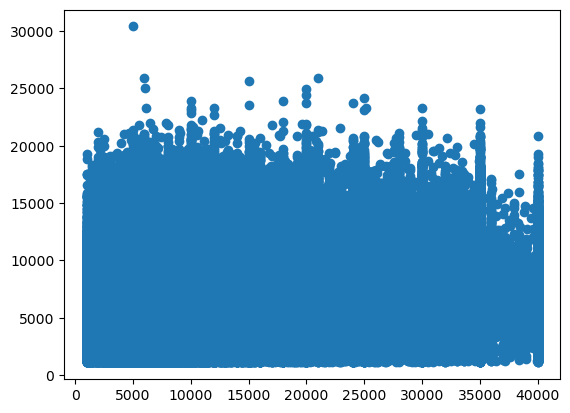

In [71]:
plt.scatter(data['loan_amnt'], data['credit_length_days'])

In [72]:
data['credit_length_days'].min()

1096

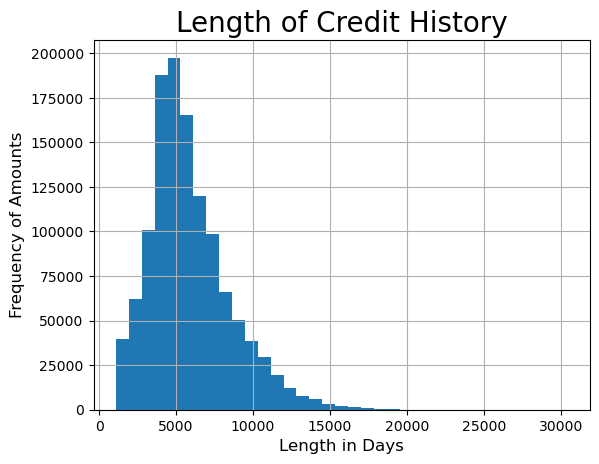

In [73]:
data['credit_length_days'].hist(bins=35)
plt.title(('Length of Credit History'), size = 20);
plt.xlabel('Length in Days', size = 12);
plt.ylabel('Frequency of Amounts', size = 12);

In [74]:
data['credit_length_days'].mean()

5868.0097472471025

In [75]:
data['annual_inc'].mean()

78467.85838115429

In [76]:
data.drop(columns=['issue_d', 'earliest_cr_line'], inplace=True)

In [77]:
data.isnull().sum().sort_values(ascending=False)

loan_amnt             0
mort_acc              0
num_il_tl             0
num_bc_tl             0
num_bc_sats           0
                     ..
pub_rec               0
open_acc              0
inq_last_6mths        0
fico_range_high       0
credit_length_days    0
Length: 71, dtype: int64

In [78]:
data['fico_range_high'].max()

850.0

In [79]:
data['fico_range_low'].min()

660.0

In [80]:
data['credit_length_days']

0           4505
1           5844
2           5600
4           6392
5          10288
           ...  
2260688     4475
2260690     5328
2260691     1949
2260692     7001
2260697     6302
Name: credit_length_days, Length: 1210906, dtype: int64

In [81]:
data.to_csv('./dataset/cleaned.csv', index=False)

With all missing values addressed in the dataset, the next steps can proceed. The upcoming notebook will focus on Feature Engineering and further Exploratory Data Analysis (EDA). To streamline this process, the current dataset is being exported as a CSV file, allowing it to be easily loaded into the next notebook for continued analysis. Splitting the workflow across notebooks ensures a more organized and efficient approach.